### 摘要
无论是在本地还是外地出行，天气都是一个重要的考量因素。中国各地气候特征差异大，且许多地区一年四季天气迥然不同。虽然我们可以在出行前看天气预报，但如果我们希望提前更早得评估是否适宜出行时，就有必要做另外的分析了。本次分析对中国20个城市，在一年中不同时间的天气是否适宜出行做了量化，总结出一些有用的规律，包括：

- 在冬季（12、1、2月），南方城市如广州、福州、昆明的气温适宜，天气状况良好，适宜出行。
- 在夏季（6、7、8月），北方城市如银川、长春、呼和浩特等城市的气温适宜，天气状况良好，适宜出行。
- 在4-5月以及9-10月份，大部分城市的出行天气适宜度都达到一年中的较好乃至最好的时期。
本次分析对不同城市的出行天气适宜度做了丰富的可视化，可以作为参考的“出行地图”。

### 数据说明
数据包含了2016年1月1日到2020年12月31日的5年时间里，中国20个城市的每日天气指标，包括最低最高气温、晴雨情况、空气质量以及风速风向。这20个城市分别是武汉、杭州、天津、长春、广州、沈阳、南宁、北京、哈尔滨、南京、合肥、昆明、南昌、福州、太原、济南、海口、呼和浩特、西宁、银川。

其中呼和浩特、海口、西宁、银川四个城市在2017年9月21日到9月22日的天气数据存在数据缺失，但缺失数量较少，对本次分析影响不大。

### 天气适宜出行度怎么算？

天气适宜出行度是一个综合指标。其由下面四个指标的加权平均数：

- 天气状况良好率：出现适宜露天行走的天气，包括晴天、阴天、多云天气（也就是不是雨雪沙雾霾的天气）等天气的比率。
- 空气质量优良率：空气质量指数（AQI）<=100的比率。
- 气温适宜率：设10-30度为适宜温度。因为每日气温是一个区间值，因此计算方式是气温区间和适宜温度的区间进行对比，计算重合的部分占当日气温区间的比率。
- 安全天气率：不出现对人有危险的天气的比率。这里的危险天气包括沙雾霾天气、大/暴级别的雨雪天气、6级以上大风。之所以没有包括高温和低温，是因为已经包含在气温适宜率中了。
得到上述四个指标后，对其取加权平均数，即得到天气适宜出行度
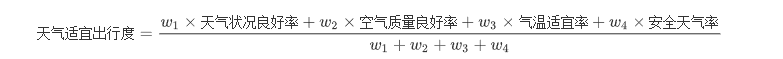

其中w1,w2,w3,w4代表相应指标的权重，目前全部为1，即四个指标的权重相同。

### 天气适宜出行度的分布

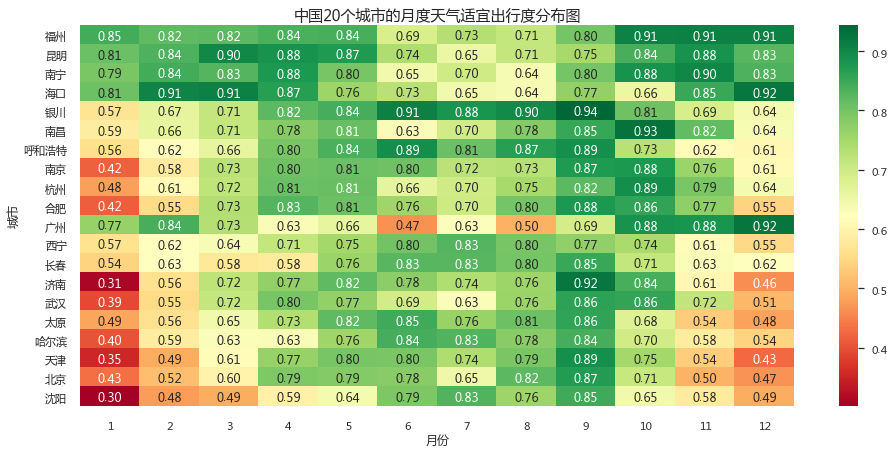

从中可以看到

- 4-5月以及9-10月是各个城市普遍的出行好时候。而且刚好遇上五一节和国庆节。
- 在冬季（12、1、2月），福州、广州、昆明等偏南方城市的天气适宜出行度较好。这些城市有着适宜的温度和更高比率的好天气。
- 而在夏季（6、7、8月），因为高温和增加的降水等原因，许多南方城市也会转入不适宜出行的时节。而此时偏北方的银川、呼和浩特、长春等城市变得适宜出行。

一些旅游城市的情况：

- 杭州最佳的出行月份是10月，其次是9月和4月。
- 昆明最佳的出行月份是3月，其次是4月和11月。
- 海口最佳的出行月份是12月，其次是2月和3月。
- 下面是对月份和城市进行聚类后的适宜度热力图，基于基于地图的可视化。作为补充参考。

### 天气适宜出行度聚类

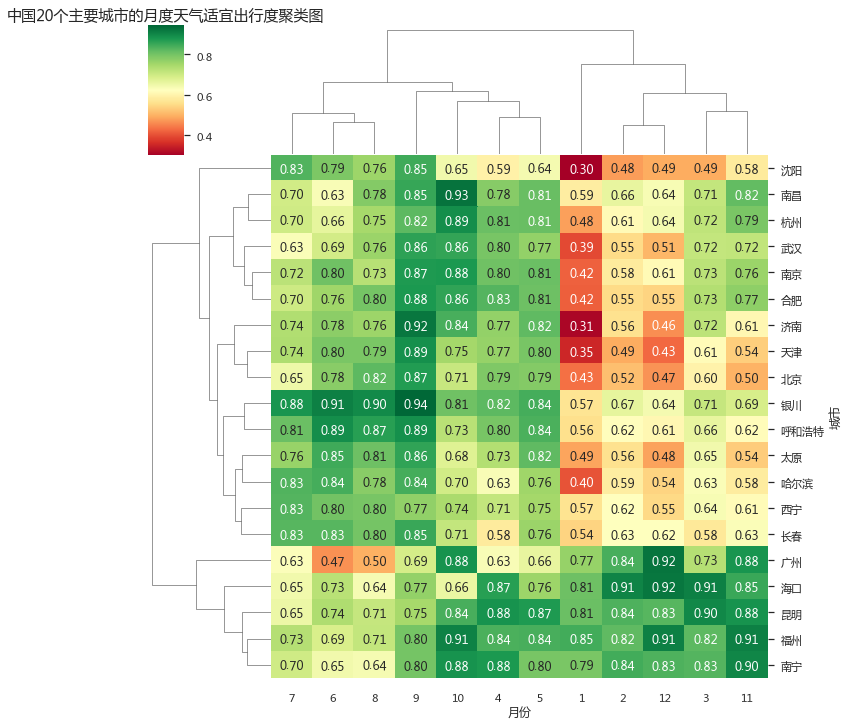

- 上图中，天气出行适度越相似的城市和月份会聚集在一起。例如广州、海口、昆明、福州、南宁就有着较高的相似度。

# 数据准备
https://www.heywhale.com/mw/project/625f33e36534930017e899bf/content

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Load the Raw Data

In [2]:

data_dir = "D:\\Tommy\\++AI\\++HeyWhale\\++气象相关\\中国主要城市近5年天气数据\\"

df_list = []
for filename in os.listdir(data_dir):
    fp = os.path.join(data_dir,filename)
    if fp.endswith(".xlsx"):
        sdf = pd.read_excel(fp)
        sdf.drop("Unnamed: 0",axis=1,inplace=True)
        sdf["filename"] = filename
        df_list.append(sdf)
raw_df = pd.concat(df_list)
raw_df.head(1)

D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\北京近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\南京近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\南宁近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\南昌近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\合肥近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\呼和浩特近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\哈尔滨近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\天津近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\太原近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\广州近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\昆明近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\杭州近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\武汉近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\沈阳近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\济南近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWhale\++气象相关\中国主要城市近5年天气数据\海口近5年天气数据.xlsx
D:\Tommy\++AI\++HeyWh

,date,MaxTemp,MinTemp,Weather,Wind,zhishu,filename
0,2016-01-01 周五,5°,-4°,霾,无持续风向微风,311 严重,北京近5年天气数据.xlsx


### 2. 字段构建

In [3]:
COLNAME_MAP = {
    "MaxTemp": "temp_max",
    "MinTemp": "temp_min",
    "Weather": "weather",
    "Wind": "wind",
    "zhishu": "aqi",
}

df = raw_df.rename(COLNAME_MAP, axis=1)
df.head(1)

,date,temp_max,temp_min,weather,wind,aqi,filename
0,2016-01-01 周五,5°,-4°,霾,无持续风向微风,311 严重,北京近5年天气数据.xlsx


In [4]:
def parse_date(x):
    return pd.to_datetime(x.split(" ")[0])

df = df.assign(
    day = raw_df["date"].map(parse_date)
)
df.head(1)

,date,temp_max,temp_min,weather,wind,aqi,filename,day
0,2016-01-01 周五,5°,-4°,霾,无持续风向微风,311 严重,北京近5年天气数据.xlsx,2016-01-01


### 3. Extract Data out from raw field

In [5]:
import re

#get the city name
def parse_city(x):
    return re.search("(\w+)近5年",x).groups()[0]

def parse_temp(x):
    if isinstance(x,int):
        return x
    else:
        return int(re.search(r"(\-?\d+)",x).group())

def parse_aqi(x):
    if isinstance(x,int):
        return x
    else:
        return int(str(x).split(" ")[0])

def parse_weather(x):
    groups = x.split("~")
    n = len(groups)
    if n >= 3:
        print(x)
    if n == 1:
        return [x,x]
    else:
        return [groups[0],groups[1]]

def parse_wind(x):
    direction = wind_scale_min = wind_scale_max = None
    if "微风" in x:
        direction = x.replace("微风","")
        wind_scale_min = 0
        wind_scale_max = 0
    else:
        search = re.search("(\w+风向?)([\d\-]+)级",x)
        if search:
            direction,scale = search.groups()
            scale_values = [int(x) for x in scale.split("-")]
            if len(scale_values) == 1:
                wind_scale_min = wind_scale_max = scale_values[0]
            else:
                wind_scale_min,wind_scale_max = scale_values[:2]
        else:
            print(x)
    return [direction,wind_scale_min,wind_scale_max]
        


assert parse_city("福州近5年天气数据.xlsx") == "福州"
assert parse_temp("21°") == 21
assert parse_temp("-2°") == -2
assert parse_aqi("94 良") == 94
assert parse_wind("北风3-4级") == ["北风",3,4]


df = df.assign(
    city=df["filename"].map(parse_city),
    temp_max=df["temp_max"].map(parse_temp),
    temp_min=df["temp_min"].map(parse_temp),
    aqi=df["aqi"].map(parse_aqi),
    weather_start = df["weather"].map(lambda x:parse_weather(x)[0]),
    weather_end = df["weather"].map(lambda x:parse_weather(x)[1]),
    month = df["day"].map(lambda x:x.month), 
    year = df["day"].map(lambda x:x.year), 
    year_month = df["day"].map(lambda x:f"{x.year}-{x.month:02}"),
    year_week = df["day"].map(lambda x:f"{x.isocalendar()[0]}-{x.isocalendar()[1]:02}"),
    weekday = df["day"].map(lambda x:x.isocalendar()[2])
)
df[["wind_direction","wind_scale_min","wind_scale_max"]] = list(map(parse_wind,df["wind"].values))
df.head()

,date,temp_max,temp_min,weather,wind,aqi,filename,day,city,weather_start,weather_end,month,year,year_month,year_week,weekday,wind_direction,wind_scale_min,wind_scale_max
0,2016-01-01 周五,5,-4,霾,无持续风向微风,311,北京近5年天气数据.xlsx,2016-01-01,北京,霾,霾,1,2016,2016-01,2015-53,5,无持续风向,0,0
1,2016-01-02 周六,6,-4,霾~雾,无持续风向微风,415,北京近5年天气数据.xlsx,2016-01-02,北京,霾,雾,1,2016,2016-01,2015-53,6,无持续风向,0,0
2,2016-01-03 周日,3,-4,霾~多云,无持续风向微风,285,北京近5年天气数据.xlsx,2016-01-03,北京,霾,多云,1,2016,2016-01,2015-53,7,无持续风向,0,0
3,2016-01-04 周一,2,-6,多云~晴,北风3-4级,22,北京近5年天气数据.xlsx,2016-01-04,北京,多云,晴,1,2016,2016-01,2016-01,1,北风,3,4
4,2016-01-05 周二,1,-7,晴,北风3-4级,105,北京近5年天气数据.xlsx,2016-01-05,北京,晴,晴,1,2016,2016-01,2016-01,2,北风,3,4


### 4. Generalize some weather phenomena

In [6]:
import re

def get_weather_type(x):
    if x in ["晴","多云","阴"]:
        return "普通天气"
    elif re.search(".*[雨雪].*",x):
        return "雨雪天气"
    elif re.search(".*[沙霾雾].*",x):
        return "沙雾霾天气"

assert get_weather_type("大雨") == "雨雪天气"
assert get_weather_type("多云") == "普通天气"
assert get_weather_type("扬沙") == "沙雾霾天气"

df = df.assign(
    weather_start_type=df["weather_start"].map(get_weather_type),
    weather_end_type=df["weather_end"].map(get_weather_type),
)

### 5. Check for Date Missing
大多是每个城市1827条数据，其中海口、南昌、呼和浩特、西宁、银川是1825天数据。后续：

- 处理日期字段
- 计算实际的日期数量
- 检查缺失的时间

可以看到数据的日期是2016年1月1日到2020年12月31日

In [7]:
df[["day"]].describe(datetime_is_numeric=True)

,day
count,36532
mean,2018-07-02 01:29:23.932990464
min,2016-01-01 00:00:00
25%,2017-04-01 00:00:00
50%,2018-07-02 00:00:00
75%,2019-10-02 00:00:00
max,2020-12-31 00:00:00


In [8]:
import datetime

duration_days = (datetime.date(2020,12,31) - datetime.date(2016,1,1)).days + 1
duration_days

1827

In [9]:
days_df = pd.DataFrame(pd.date_range(start="2016-01-01",end="2020-12-31"),columns=["day"])

miss_city_df = df.groupby("city").agg(
    count=("day","count")
).query("count != 1827")
miss_city_df

,count
city,
呼和浩特,1825
海口,1825
西宁,1825
银川,1825


缺失数据的为上述四个城市

### 6. Checking for duplication

In [10]:
df.duplicated().sum()

0

### 7. Weird Value Check

In [11]:
df.describe()

,temp_max,temp_min,aqi,month,year,weekday
count,36532.000000,36532.000000,36532.000000,36532.000000,36532.000000,36532.000000
mean,19.922643,10.482153,68.923793,6.520530,2018.000219,3.999891
std,11.332383,12.008204,41.493728,3.449442,1.415084,2.000219
min,-24.000000,-35.000000,8.000000,1.000000,2016.000000,1.000000
25%,12.000000,3.000000,42.000000,4.000000,2017.000000,2.000000
50%,22.000000,12.000000,59.000000,7.000000,2018.000000,4.000000
75%,29.000000,20.000000,83.000000,10.000000,2019.000000,6.000000
max,41.000000,30.000000,499.000000,12.000000,2020.000000,7.000000


In [12]:
df.head(1)

,date,temp_max,temp_min,weather,wind,aqi,filename,day,city,weather_start,...,month,year,year_month,year_week,weekday,wind_direction,wind_scale_min,wind_scale_max,weather_start_type,weather_end_type
0,2016-01-01 周五,5,-4,霾,无持续风向微风,311,北京近5年天气数据.xlsx,2016-01-01,北京,霾,...,1,2016,2016-01,2015-53,5,无持续风向,0,0,沙雾霾天气,沙雾霾天气


In [13]:
pd.value_counts(df["wind_direction"]).to_frame()

,wind_direction
东北风,7300
无持续风向,6566
西南风,5630
东南风,5029
西北风,3744
南风,2758
北风,2468
东风,1944
西风,1093


In [14]:
df.drop(["filename"],axis=1,inplace=True)

### 8. Export Processed Data

In [15]:
df.to_csv("D:\\Tommy\\++AI\\++HeyWhale\\++气象相关\\中国主要城市近5年天气数据\\prepared_city_weather",encoding="utf-8-sig",index=False)

https://www.heywhale.com/mw/project/625f33e36534930017e899bf/content

https://blog.51cto.com/u_13571885/2971760

In [17]:
import calplot

In [18]:
df_bj = df[df['city']=='北京']
df_bj

,date,temp_max,temp_min,weather,wind,aqi,day,city,weather_start,weather_end,month,year,year_month,year_week,weekday,wind_direction,wind_scale_min,wind_scale_max,weather_start_type,weather_end_type
0,2016-01-01 周五,5,-4,霾,无持续风向微风,311,2016-01-01,北京,霾,霾,1,2016,2016-01,2015-53,5,无持续风向,0,0,沙雾霾天气,沙雾霾天气
1,2016-01-02 周六,6,-4,霾~雾,无持续风向微风,415,2016-01-02,北京,霾,雾,1,2016,2016-01,2015-53,6,无持续风向,0,0,沙雾霾天气,沙雾霾天气
2,2016-01-03 周日,3,-4,霾~多云,无持续风向微风,285,2016-01-03,北京,霾,多云,1,2016,2016-01,2015-53,7,无持续风向,0,0,沙雾霾天气,普通天气
3,2016-01-04 周一,2,-6,多云~晴,北风3-4级,22,2016-01-04,北京,多云,晴,1,2016,2016-01,2016-01,1,北风,3,4,普通天气,普通天气
4,2016-01-05 周二,1,-7,晴,北风3-4级,105,2016-01-05,北京,晴,晴,1,2016,2016-01,2016-01,2,北风,3,4,普通天气,普通天气
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2020-12-27 周日,7,-5,晴~多云,东北风1级,85,2020-12-27,北京,晴,多云,12,2020,2020-12,2020-52,7,东北风,1,1,普通天气,普通天气
1823,2020-12-28 周一,2,-10,阴~多云,东北风2级,83,2020-12-28,北京,阴,多云,12,2020,2020-12,2020-53,1,东北风,2,2,普通天气,普通天气
1824,2020-12-29 周二,-8,-13,多云~晴,西北风4级,56,2020-12-29,北京,多云,晴,12,2020,2020-12,2020-53,2,西北风,4,4,普通天气,普通天气
1825,2020-12-30 周三,-5,-13,晴,西北风3级,26,2020-12-30,北京,晴,晴,12,2020,2020-12,2020-53,3,西北风,3,3,普通天气,普通天气


In [26]:
#group data by date (remove hourly data)
df_pmi_grp = df_bj.groupby("date", sort=True)["aqi"].max()
df_pmi_grp

date
2016-01-01 周五    311
2016-01-02 周六    415
2016-01-03 周日    285
2016-01-04 周一     22
2016-01-05 周二    105
                ... 
2020-12-27 周日     85
2020-12-28 周一     83
2020-12-29 周二     56
2020-12-30 周三     26
2020-12-31 周四     31
Name: aqi, Length: 1827, dtype: int64

In [27]:
n_days = 1825
pm_values= df_pmi_grp.values[:n_days]
all_days = pd.date_range('01/01/2016', periods=n_days, freq='D')
events = pd.Series(pm_values, index=all_days)

In [45]:
#import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

colors = ["#00ff00", "#FFFF00", "#ffa500", "#FF0000", "#8b008b", "#8b008b","#8C0026","#8C0026","#8C0026","#8C0026"]
my_cmap = ListedColormap(colors, name="my_cmap")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x850 with 6 Axes>,
 array([<Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


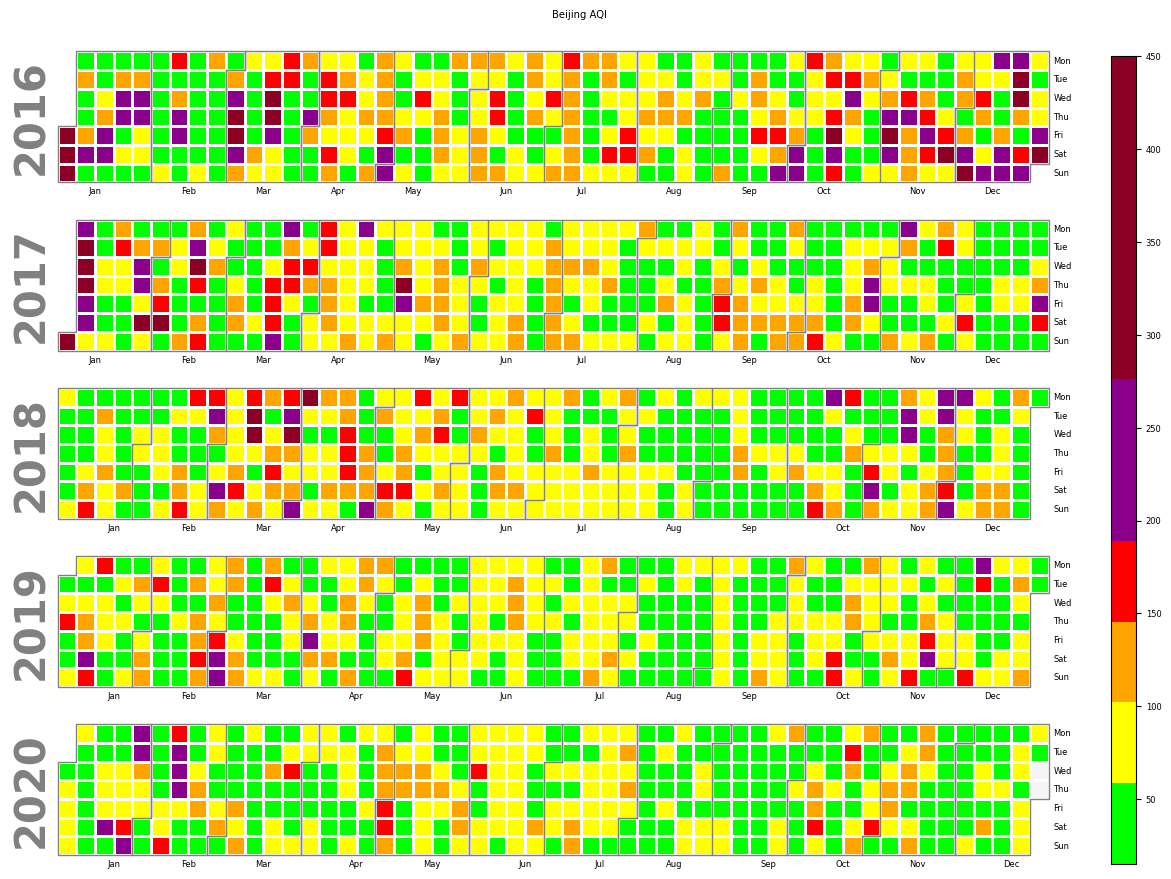

In [46]:
#calplot.calplot(events, suptitle = 'Beijing AQI',cmap='YlGn', colorbar=True)
calplot.calplot(events, suptitle = 'Beijing AQI',yearascending =True, colorbar=True, cmap=my_cmap)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x850 with 6 Axes>,
 array([<Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


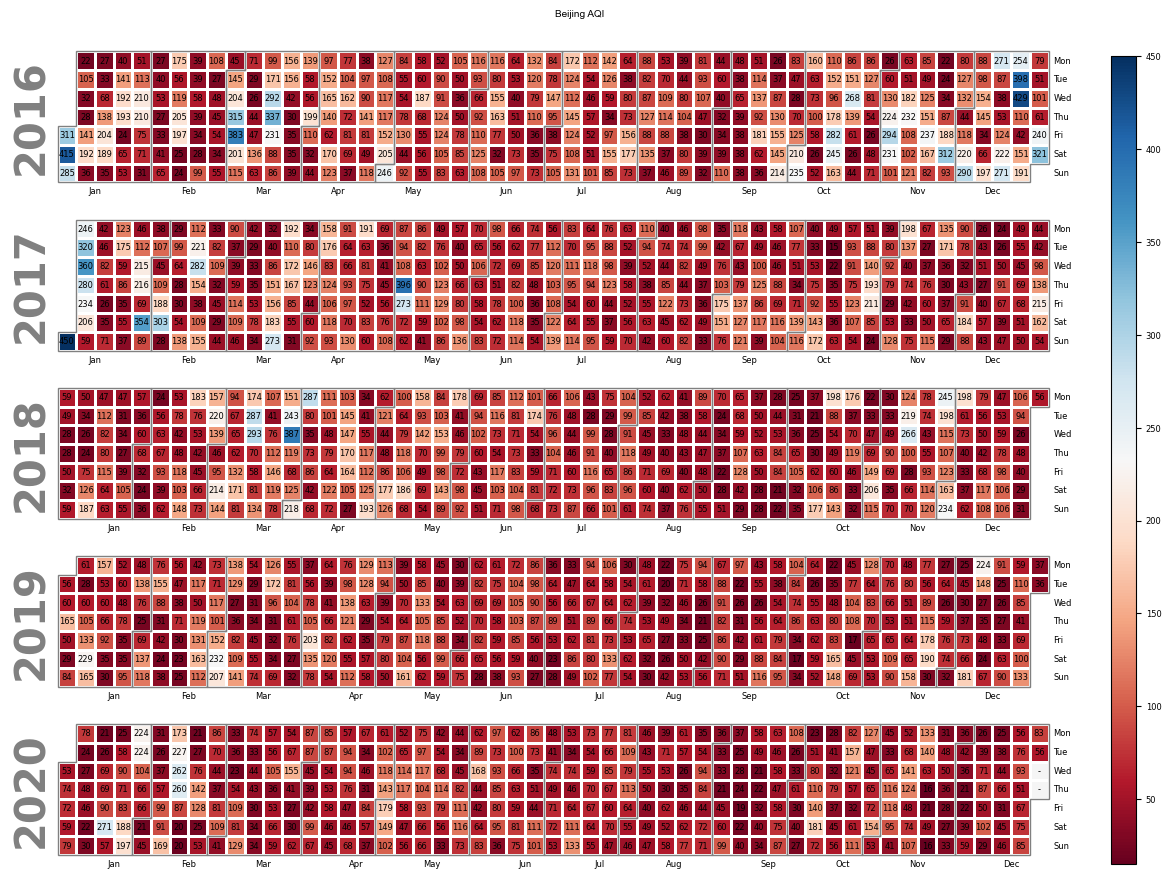

In [39]:
csfont = {'fontname':'Arial'}
plt.rcParams['font.size'] = 6
calplot.calplot(events, suptitle = 'Beijing AQI',cmap = 'RdBu',yearascending =True, colorbar=True,suptitle_kws=csfont, textformat = '{:.0f}', textfiller = '-', textcolor = 'black')
